# Let's see if we can find a 'better' temperature function 

In [1]:
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
params = {
'f_layer_thickness' : 200000,
'delta_t_icb' : 0.0,
'xfe_outer_core' : 0.95,
'xfe_icb' : 0.95,
'growth_prefactor' : 150.0,
'i0' : 1.0e-10,
'surf_energy' : 1.08e-2,
'wetting_angle' : 180.0,
'number_of_analysis_points' : 5,
'r_icb' : 1221500,
'r_cmb' : 3480000,
'gruneisen_parameter' : 1.5,
'chemical_diffusivity' : 1.0e-9,
'kinematic_viscosity' : 1.0e-6,
'thermal_conductivity' : 100.0}

In [3]:
def make_new_t_func(radius_top_flayer, r_icb, t_top_flayer, analysis_radii):
    
    layer_thickness = radius_top_flayer - r_icb
    
    def t_func(params):
        # params contains dt_dr and a Dt for each point not at the ends 
        assert params.shape[0] == analysis_radii.shape[0] - 1, "params radii mismatch"
        dt_dr = params[0]
        t_points = t_top_flayer - (radius_top_flayer - analysis_radii) * dt_dr
        t_points[1:-1] = t_points[1:-1] + params[1:]
        return spi.InterpolatedUnivariateSpline(analysis_radii, t_points, ext='extrapolate')
    
    return t_func
        
        
            
        

In [4]:
t_func = make_new_t_func(params['f_layer_thickness']+params['r_icb'], params['r_icb'], 5000.0,
                np.linspace(params['r_icb'], params['f_layer_thickness']+params['r_icb'], params['number_of_analysis_points']))

In [5]:
this_t_func = t_func(np.array([-0.0025, 100.0, 90.0, 10.0]))
this_t_func_base = t_func(np.array([-0.0025, 0.0, 0.0, 0.0]))

In [6]:
r = np.arange(params['r_icb'], params['f_layer_thickness']+params['r_icb'])
r_points = np.linspace(params['r_icb'], params['f_layer_thickness']+params['r_icb'], params['number_of_analysis_points'])

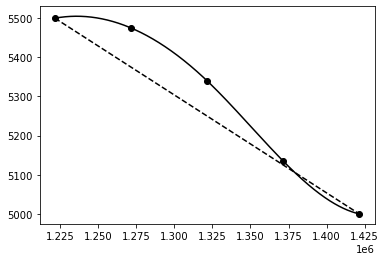

In [7]:
fig, ax = plt.subplots()
ax.plot(r, this_t_func(r), 'k-', label='Function')
ax.plot(r_points, this_t_func(r_points), 'ko', label='Control points')
ax.plot(r, this_t_func_base(r), 'k--', label='No pert case')
plt.show()